In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
from glob import glob
import os
import seaborn as sns
import xarray as xr

import matplotlib.pyplot as plt

sns.set(font="Helvetica")

seas = 'djf'

In [2]:
diri = r'/Users/fadhlilrizki/Documents/PhD/thesis/dataout/'
diro = r'/Users/fadhlilrizki/Documents/PhD/thesis/figures/stats/'

In [3]:
ds_QL = xr.open_dataset(diri+"combined_wave_extreme_Queensland_"+seas+".nc")
ds_QL

<xarray.Dataset>
Dimensions:    (list: 50, ncl1: 50)
Dimensions without coordinates: list, ncl1
Data variables:
    composite  (list) float32 ...
    median     (ncl1) float32 ...
    alpha      (list) float32 ...

In [4]:
combination = ["er_er_drydry",
               "er_er_wet_wet",
               
               "er_klv_drydry",
               "er_klv_drywet",
               "er_klv_wetdry",
               "er_klv_wetwet",
               
               "er_mjo_drydry",
               "er_mjo_drywet",
               "er_mjo_wetdry",
               "er_mjo_wetwet",
               
               "er_mrg_drydry",
               "er_mrg_drywet",
               "er_mrg_wetdry",
               "er_mrg_wetwet",
               
               "er_td_drydry",
               "er_td_drywet",
               "er_td_wetdry",
               "er_td_wetwet",
               
               "klv_klv_drydry",
               "klv_klv_wet_wet",
               
               "mjo_klv_drydry",
               "mjo_klv_drywet",
               "mjo_klv_wetdry",
               "mjo_klv_wetwet",
               
               "mjo_mjo_drydry",
               "mjo_mjo_wetwet",   
               
               "mrg_klv_drydry",
               "mrg_klv_drywet",
               "mrg_klv_wetdry",
               "mrg_klv_wetwet",
               
               "mrg_mjo_drydry",
               "mrg_mjo_drywet",
               "mrg_mjo_wetdry",
               "mrg_mjo_wetwet",
               
               "mrg_mrg_drydry",
               "mrg_mrg_wetwet",
               
               "mrg_td_drydry",
               "mrg_td_drywet",
               "mrg_td_wetdry",
               "mrg_td_wetwet",
               
               'td_klv_drydry',
               'td_klv_drywet',
               'td_klv_wetdry',
               'td_klv_wetwet',
               
               'td_mjo_drydry',
               'td_mjo_drywet',
               'td_mjo_wetdry',
               'td_mjo_wetwet',
               
               'td_td_drydry',
               'td_td_wetwet',
               
              ]

len(combination)

50

In [5]:
c = ds_QL["composite"]
a = ds_QL["alpha"]
ndays = ds_QL["composite"].attrs["ndays"]
ndays
# attrs["ndays"]

array([479, 801,  63,  39, 126,  58, 162, 194, 223, 299, 166,  91, 302,
       161, 104,  97, 153, 141, 367, 210, 137,  71, 128,  71, 864, 897,
       145,  69,  60,  31, 307, 310, 154, 166, 916, 475, 222, 171,  63,
        94,  86,  40,  71,  35, 177, 181, 166, 166, 528, 485], dtype=int32)

In [6]:
cols = ["er-wet", "klv-wet", "mjo-wet", "mrg-wet", "td-wet", "er-dry", "klv-dry", "mjo-dry", "mrg-dry", "td-dry"]

In [7]:
rows = cols


In [8]:
df = []
counter = 0
for i in combination:
    val = c.values[counter]
    df.append(val)
    counter+=1
    
df = pd.DataFrame([df,combination]).transpose()
df = df.rename(columns={0:"prec",1:"combination"})

df["prec"] = df["prec"].astype(float)
df["prec"]

0     0.913222
1     1.067395
2     1.262434
3     1.529487
4     0.789021
5     3.085345
6     0.490947
7     1.434880
8     0.445815
9     1.595987
10    1.078012
11    1.529487
12    0.724227
13    1.111491
14    0.573558
15    0.819931
16    0.909695
17    2.256265
18    0.921026
19    1.609603
20    0.725669
21    0.840141
22    1.398047
23    2.240376
24    0.460262
25    1.618153
26    0.548506
27    0.864493
28    0.994167
29    2.565591
30    0.453366
31    1.346936
32    0.645563
33    1.676908
34    0.738028
35    1.297649
36    0.537387
37    1.162768
38    1.262434
39    1.480674
40    0.693605
41    1.988333
42    1.680282
43    3.408571
44    0.224670
45    1.208379
46    0.958233
47    2.395582
48    0.715499
49    1.557869
Name: prec, dtype: float64

In [9]:
df_a = []
counter = 0
for i in combination:
    val = a.values[counter]
    df_a.append(val)
    counter+=1
    
df_a = pd.DataFrame([df_a,combination]).transpose()
df_a = df_a.rename(columns={0:"alpha",1:"combination"})

df_a["alpha"] = df_a["alpha"].astype(float)
df_a["alpha"]

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     1.0
6     1.0
7     0.0
8     1.0
9     1.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    1.0
18    0.0
19    1.0
20    0.0
21    0.0
22    0.0
23    1.0
24    1.0
25    1.0
26    0.0
27    0.0
28    0.0
29    1.0
30    1.0
31    0.0
32    0.0
33    0.0
34    1.0
35    0.0
36    0.0
37    0.0
38    0.0
39    0.0
40    0.0
41    0.0
42    0.0
43    1.0
44    1.0
45    0.0
46    0.0
47    1.0
48    0.0
49    1.0
Name: alpha, dtype: float64

In [10]:
df_n = []
counter = 0
for i in combination:
    val = ndays[counter]
    df_n.append(val)
    counter+=1
    
df_n = pd.DataFrame([df_n,combination]).transpose()
df_n = df_n.rename(columns={0:"ndays",1:"combination"})

df_n["ndays"] = df_n["ndays"].astype(float)
df_n

,ndays,combination
0,479.0,er_er_drydry
1,801.0,er_er_wet_wet
2,63.0,er_klv_drydry
3,39.0,er_klv_drywet
4,126.0,er_klv_wetdry
5,58.0,er_klv_wetwet
6,162.0,er_mjo_drydry
7,194.0,er_mjo_drywet
8,223.0,er_mjo_wetdry
9,299.0,er_mjo_wetwet


In [11]:
# df["prec"] = [df["prec"].iloc[i].astype(float) for i in range(len(df["prec"]))]

In [12]:
x = pd.DataFrame(columns=cols, index=rows)
a = pd.DataFrame(columns=cols, index=rows)
n = pd.DataFrame(columns=cols, index=rows)
x

,er-wet,klv-wet,mjo-wet,mrg-wet,td-wet,er-dry,klv-dry,mjo-dry,mrg-dry,td-dry
er-wet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
klv-wet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mjo-wet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mrg-wet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
td-wet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
er-dry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
klv-dry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mjo-dry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mrg-dry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
td-dry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:

x.loc["er-dry","er-dry"] = df["prec"].loc[0].astype(float)
x.loc["er-wet","er-wet"] = df["prec"].loc[1].astype(float)

#erklv
x.loc["er-dry","klv-dry"] = df["prec"].loc[2].astype(float)
x.loc["er-dry","klv-wet"] = df["prec"].loc[3].astype(float)
x.loc["er-wet","klv-dry"] = df["prec"].loc[4].astype(float)
x.loc["er-wet","klv-wet"] = df["prec"].loc[5].astype(float)

x.loc["klv-dry","er-dry"] = df["prec"].loc[2].astype(float)
x.loc["klv-wet","er-dry"] = df["prec"].loc[3].astype(float)
x.loc["klv-dry","er-wet"] = df["prec"].loc[4].astype(float)
x.loc["klv-wet","er-wet"] = df["prec"].loc[5].astype(float)

#ermjo
x.loc["er-dry","mjo-dry"] = df["prec"].loc[6].astype(float)
x.loc["er-dry","mjo-wet"] = df["prec"].loc[7].astype(float)
x.loc["er-wet","mjo-dry"] = df["prec"].loc[8].astype(float)
x.loc["er-wet","mjo-wet"] = df["prec"].loc[9].astype(float)

x.loc["mjo-dry","er-dry"] = df["prec"].loc[6].astype(float)
x.loc["mjo-wet","er-dry"] = df["prec"].loc[7].astype(float)
x.loc["mjo-dry","er-wet"] = df["prec"].loc[8].astype(float)
x.loc["mjo-wet","er-wet"] = df["prec"].loc[9].astype(float)

#ermrg
x.loc["er-dry","mrg-dry"] = df["prec"].loc[10].astype(float)
x.loc["er-dry","mrg-wet"] = df["prec"].loc[11].astype(float)
x.loc["er-wet","mrg-dry"] = df["prec"].loc[12].astype(float)
x.loc["er-wet","mrg-wet"] = df["prec"].loc[13].astype(float)

x.loc["mrg-dry","er-dry"] = df["prec"].loc[10].astype(float)
x.loc["mrg-wet","er-dry"] = df["prec"].loc[11].astype(float)
x.loc["mrg-dry","er-wet"] = df["prec"].loc[12].astype(float)
x.loc["mrg-wet","er-wet"] = df["prec"].loc[13].astype(float)

#ertd
x.loc["er-dry","td-dry"] = df["prec"].loc[14].astype(float)
x.loc["er-dry","td-wet"] = df["prec"].loc[15].astype(float)
x.loc["er-wet","td-dry"] = df["prec"].loc[16].astype(float)
x.loc["er-wet","td-wet"] = df["prec"].loc[17].astype(float)

x.loc["td-dry","er-dry"] = df["prec"].loc[14].astype(float)
x.loc["td-wet","er-dry"] = df["prec"].loc[15].astype(float)
x.loc["td-dry","er-wet"] = df["prec"].loc[16].astype(float)
x.loc["td-wet","er-wet"] = df["prec"].loc[17].astype(float)


#klvklv
x.loc["klv-dry","klv-dry"] = df["prec"].loc[18].astype(float)
x.loc["klv-wet","klv-wet"] = df["prec"].loc[19].astype(float)

#mjoklv
x.loc["mjo-dry","klv-dry"] = df["prec"].loc[20].astype(float)
x.loc["mjo-dry","klv-wet"] = df["prec"].loc[21].astype(float)
x.loc["mjo-wet","klv-dry"] = df["prec"].loc[22].astype(float)
x.loc["mjo-wet","klv-wet"] = df["prec"].loc[23].astype(float)

x.loc["klv-dry","mjo-dry"] = df["prec"].loc[20].astype(float)
x.loc["klv-wet","mjo-dry"] = df["prec"].loc[21].astype(float)
x.loc["klv-dry","mjo-wet"] = df["prec"].loc[22].astype(float)
x.loc["klv-wet","mjo-wet"] = df["prec"].loc[23].astype(float)

#mjomjo
x.loc["mjo-dry","mjo-dry"] = df["prec"].loc[24].astype(float)
x.loc["mjo-wet","mjo-wet"] = df["prec"].loc[25].astype(float)

#mrgklv
x.loc["mrg-dry","klv-dry"] = df["prec"].loc[26].astype(float)
x.loc["mrg-dry","klv-wet"] = df["prec"].loc[27].astype(float)
x.loc["mrg-wet","klv-dry"] = df["prec"].loc[28].astype(float)
x.loc["mrg-wet","klv-wet"] = df["prec"].loc[29].astype(float)

x.loc["klv-dry","mrg-dry"] = df["prec"].loc[26].astype(float)
x.loc["klv-wet","mrg-dry"] = df["prec"].loc[27].astype(float)
x.loc["klv-dry","mrg-wet"] = df["prec"].loc[28].astype(float)
x.loc["klv-wet","mrg-wet"] = df["prec"].loc[29].astype(float)

#mrgmjo
x.loc["mrg-dry","mjo-dry"] = df["prec"].loc[30].astype(float)
x.loc["mrg-dry","mjo-wet"] = df["prec"].loc[31].astype(float)
x.loc["mrg-wet","mjo-dry"] = df["prec"].loc[32].astype(float)
x.loc["mrg-wet","mjo-wet"] = df["prec"].loc[33].astype(float)

x.loc["mjo-dry","mrg-dry"] = df["prec"].loc[30].astype(float)
x.loc["mjo-wet","mrg-dry"] = df["prec"].loc[31].astype(float)
x.loc["mjo-dry","mrg-wet"] = df["prec"].loc[32].astype(float)
x.loc["mjo-wet","mrg-wet"] = df["prec"].loc[33].astype(float)

#mrgmrg
x.loc["mrg-dry","mrg-dry"] = df["prec"].loc[34].astype(float)
x.loc["mrg-wet","mrg-wet"] = df["prec"].loc[35].astype(float)

#mrgtd
x.loc["mrg-dry","td-dry"] = df["prec"].loc[36].astype(float)
x.loc["mrg-dry","td-wet"] = df["prec"].loc[37].astype(float)
x.loc["mrg-wet","td-dry"] = df["prec"].loc[38].astype(float)
x.loc["mrg-wet","td-wet"] = df["prec"].loc[39].astype(float)

x.loc["td-dry","mrg-dry"] = df["prec"].loc[36].astype(float)
x.loc["td-wet","mrg-dry"] = df["prec"].loc[37].astype(float)
x.loc["td-dry","mrg-wet"] = df["prec"].loc[38].astype(float)
x.loc["td-wet","mrg-wet"] = df["prec"].loc[39].astype(float)

#tdklv
x.loc["td-dry","klv-dry"] = df["prec"].loc[40].astype(float)
x.loc["td-dry","klv-wet"] = df["prec"].loc[41].astype(float)
x.loc["td-wet","klv-dry"] = df["prec"].loc[42].astype(float)
x.loc["td-wet","klv-wet"] = df["prec"].loc[43].astype(float)

x.loc["klv-dry","td-dry"] = df["prec"].loc[40].astype(float)
x.loc["klv-wet","td-dry"] = df["prec"].loc[41].astype(float)
x.loc["klv-dry","td-wet"] = df["prec"].loc[42].astype(float)
x.loc["klv-wet","td-wet"] = df["prec"].loc[43].astype(float)

#tdmjo
x.loc["td-dry","mjo-dry"] = df["prec"].loc[44].astype(float)
x.loc["td-dry","mjo-wet"] = df["prec"].loc[45].astype(float)
x.loc["td-wet","mjo-dry"] = df["prec"].loc[46].astype(float)
x.loc["td-wet","mjo-wet"] = df["prec"].loc[47].astype(float)

x.loc["mjo-dry","td-dry"] = df["prec"].loc[44].astype(float)
x.loc["mjo-wet","td-dry"] = df["prec"].loc[45].astype(float)
x.loc["mjo-dry","td-wet"] = df["prec"].loc[46].astype(float)
x.loc["mjo-wet","td-wet"] = df["prec"].loc[47].astype(float)

#tdtd
x.loc["td-dry","td-dry"] = df["prec"].loc[48].astype(float)
x.loc["td-wet","td-wet"] = df["prec"].loc[49].astype(float)

In [14]:

a.loc["er-dry","er-dry"] = df_a["alpha"].loc[0].astype(float)
a.loc["er-wet","er-wet"] = df_a["alpha"].loc[1].astype(float)

#erklv
a.loc["er-dry","klv-dry"] = df_a["alpha"].loc[2].astype(float)
a.loc["er-dry","klv-wet"] = df_a["alpha"].loc[3].astype(float)
a.loc["er-wet","klv-dry"] = df_a["alpha"].loc[4].astype(float)
a.loc["er-wet","klv-wet"] = df_a["alpha"].loc[5].astype(float)

a.loc["klv-dry","er-dry"] = df_a["alpha"].loc[2].astype(float)
a.loc["klv-wet","er-dry"] = df_a["alpha"].loc[3].astype(float)
a.loc["klv-dry","er-wet"] = df_a["alpha"].loc[4].astype(float)
a.loc["klv-wet","er-wet"] = df_a["alpha"].loc[5].astype(float)

#ermjo
a.loc["er-dry","mjo-dry"] = df_a["alpha"].loc[6].astype(float)
a.loc["er-dry","mjo-wet"] = df_a["alpha"].loc[7].astype(float)
a.loc["er-wet","mjo-dry"] = df_a["alpha"].loc[8].astype(float)
a.loc["er-wet","mjo-wet"] = df_a["alpha"].loc[9].astype(float)

a.loc["mjo-dry","er-dry"] = df_a["alpha"].loc[6].astype(float)
a.loc["mjo-wet","er-dry"] = df_a["alpha"].loc[7].astype(float)
a.loc["mjo-dry","er-wet"] = df_a["alpha"].loc[8].astype(float)
a.loc["mjo-wet","er-wet"] = df_a["alpha"].loc[9].astype(float)

#ermrg
a.loc["er-dry","mrg-dry"] = df_a["alpha"].loc[10].astype(float)
a.loc["er-dry","mrg-wet"] = df_a["alpha"].loc[11].astype(float)
a.loc["er-wet","mrg-dry"] = df_a["alpha"].loc[12].astype(float)
a.loc["er-wet","mrg-wet"] = df_a["alpha"].loc[13].astype(float)

a.loc["mrg-dry","er-dry"] = df_a["alpha"].loc[10].astype(float)
a.loc["mrg-wet","er-dry"] = df_a["alpha"].loc[11].astype(float)
a.loc["mrg-dry","er-wet"] = df_a["alpha"].loc[12].astype(float)
a.loc["mrg-wet","er-wet"] = df_a["alpha"].loc[13].astype(float)

#ertd
a.loc["er-dry","td-dry"] = df_a["alpha"].loc[14].astype(float)
a.loc["er-dry","td-wet"] = df_a["alpha"].loc[15].astype(float)
a.loc["er-wet","td-dry"] = df_a["alpha"].loc[16].astype(float)
a.loc["er-wet","td-wet"] = df_a["alpha"].loc[17].astype(float)

a.loc["td-dry","er-dry"] = df_a["alpha"].loc[14].astype(float)
a.loc["td-wet","er-dry"] = df_a["alpha"].loc[15].astype(float)
a.loc["td-dry","er-wet"] = df_a["alpha"].loc[16].astype(float)
a.loc["td-wet","er-wet"] = df_a["alpha"].loc[17].astype(float)


#klvklv
a.loc["klv-dry","klv-dry"] = df_a["alpha"].loc[18].astype(float)
a.loc["klv-wet","klv-wet"] = df_a["alpha"].loc[19].astype(float)

#mjoklv
a.loc["mjo-dry","klv-dry"] = df_a["alpha"].loc[20].astype(float)
a.loc["mjo-dry","klv-wet"] = df_a["alpha"].loc[21].astype(float)
a.loc["mjo-wet","klv-dry"] = df_a["alpha"].loc[22].astype(float)
a.loc["mjo-wet","klv-wet"] = df_a["alpha"].loc[23].astype(float)

a.loc["klv-dry","mjo-dry"] = df_a["alpha"].loc[20].astype(float)
a.loc["klv-wet","mjo-dry"] = df_a["alpha"].loc[21].astype(float)
a.loc["klv-dry","mjo-wet"] = df_a["alpha"].loc[22].astype(float)
a.loc["klv-wet","mjo-wet"] = df_a["alpha"].loc[23].astype(float)

#mjomjo
a.loc["mjo-dry","mjo-dry"] = df_a["alpha"].loc[24].astype(float)
a.loc["mjo-wet","mjo-wet"] = df_a["alpha"].loc[25].astype(float)

#mrgklv
a.loc["mrg-dry","klv-dry"] = df_a["alpha"].loc[26].astype(float)
a.loc["mrg-dry","klv-wet"] = df_a["alpha"].loc[27].astype(float)
a.loc["mrg-wet","klv-dry"] = df_a["alpha"].loc[28].astype(float)
a.loc["mrg-wet","klv-wet"] = df_a["alpha"].loc[29].astype(float)

a.loc["klv-dry","mrg-dry"] = df_a["alpha"].loc[26].astype(float)
a.loc["klv-wet","mrg-dry"] = df_a["alpha"].loc[27].astype(float)
a.loc["klv-dry","mrg-wet"] = df_a["alpha"].loc[28].astype(float)
a.loc["klv-wet","mrg-wet"] = df_a["alpha"].loc[29].astype(float)

#mrgmjo
a.loc["mrg-dry","mjo-dry"] = df_a["alpha"].loc[30].astype(float)
a.loc["mrg-dry","mjo-wet"] = df_a["alpha"].loc[31].astype(float)
a.loc["mrg-wet","mjo-dry"] = df_a["alpha"].loc[32].astype(float)
a.loc["mrg-wet","mjo-wet"] = df_a["alpha"].loc[33].astype(float)

a.loc["mjo-dry","mrg-dry"] = df_a["alpha"].loc[30].astype(float)
a.loc["mjo-wet","mrg-dry"] = df_a["alpha"].loc[31].astype(float)
a.loc["mjo-dry","mrg-wet"] = df_a["alpha"].loc[32].astype(float)
a.loc["mjo-wet","mrg-wet"] = df_a["alpha"].loc[33].astype(float)

#mrgmrg
a.loc["mrg-dry","mrg-dry"] = df_a["alpha"].loc[34].astype(float)
a.loc["mrg-wet","mrg-wet"] = df_a["alpha"].loc[35].astype(float)

#mrgtd
a.loc["mrg-dry","td-dry"] = df_a["alpha"].loc[36].astype(float)
a.loc["mrg-dry","td-wet"] = df_a["alpha"].loc[37].astype(float)
a.loc["mrg-wet","td-dry"] = df_a["alpha"].loc[38].astype(float)
a.loc["mrg-wet","td-wet"] = df_a["alpha"].loc[39].astype(float)

a.loc["td-dry","mrg-dry"] = df_a["alpha"].loc[36].astype(float)
a.loc["td-wet","mrg-dry"] = df_a["alpha"].loc[37].astype(float)
a.loc["td-dry","mrg-wet"] = df_a["alpha"].loc[38].astype(float)
a.loc["td-wet","mrg-wet"] = df_a["alpha"].loc[39].astype(float)

#tdklv
a.loc["td-dry","klv-dry"] = df_a["alpha"].loc[40].astype(float)
a.loc["td-dry","klv-wet"] = df_a["alpha"].loc[41].astype(float)
a.loc["td-wet","klv-dry"] = df_a["alpha"].loc[42].astype(float)
a.loc["td-wet","klv-wet"] = df_a["alpha"].loc[43].astype(float)

a.loc["klv-dry","td-dry"] = df_a["alpha"].loc[40].astype(float)
a.loc["klv-wet","td-dry"] = df_a["alpha"].loc[41].astype(float)
a.loc["klv-dry","td-wet"] = df_a["alpha"].loc[42].astype(float)
a.loc["klv-wet","td-wet"] = df_a["alpha"].loc[43].astype(float)

#tdmjo
a.loc["td-dry","mjo-dry"] = df_a["alpha"].loc[44].astype(float)
a.loc["td-dry","mjo-wet"] = df_a["alpha"].loc[45].astype(float)
a.loc["td-wet","mjo-dry"] = df_a["alpha"].loc[46].astype(float)
a.loc["td-wet","mjo-wet"] = df_a["alpha"].loc[47].astype(float)

a.loc["mjo-dry","td-dry"] = df_a["alpha"].loc[44].astype(float)
a.loc["mjo-wet","td-dry"] = df_a["alpha"].loc[45].astype(float)
a.loc["mjo-dry","td-wet"] = df_a["alpha"].loc[46].astype(float)
a.loc["mjo-wet","td-wet"] = df_a["alpha"].loc[47].astype(float)

#tdtd
a.loc["td-dry","td-dry"] = df_a["alpha"].loc[48].astype(float)
a.loc["td-wet","td-wet"] = df_a["alpha"].loc[49].astype(float)

In [15]:

n.loc["er-dry","er-dry"] = df_n["ndays"].loc[0].astype(float)
n.loc["er-wet","er-wet"] = df_n["ndays"].loc[1].astype(float)

#erklv
n.loc["er-dry","klv-dry"] = df_n["ndays"].loc[2].astype(float)
n.loc["er-dry","klv-wet"] = df_n["ndays"].loc[3].astype(float)
n.loc["er-wet","klv-dry"] = df_n["ndays"].loc[4].astype(float)
n.loc["er-wet","klv-wet"] = df_n["ndays"].loc[5].astype(float)

n.loc["klv-dry","er-dry"] = df_n["ndays"].loc[2].astype(float)
n.loc["klv-wet","er-dry"] = df_n["ndays"].loc[3].astype(float)
n.loc["klv-dry","er-wet"] = df_n["ndays"].loc[4].astype(float)
n.loc["klv-wet","er-wet"] = df_n["ndays"].loc[5].astype(float)

#ermjo
n.loc["er-dry","mjo-dry"] = df_n["ndays"].loc[6].astype(float)
n.loc["er-dry","mjo-wet"] = df_n["ndays"].loc[7].astype(float)
n.loc["er-wet","mjo-dry"] = df_n["ndays"].loc[8].astype(float)
n.loc["er-wet","mjo-wet"] = df_n["ndays"].loc[9].astype(float)

n.loc["mjo-dry","er-dry"] = df_n["ndays"].loc[6].astype(float)
n.loc["mjo-wet","er-dry"] = df_n["ndays"].loc[7].astype(float)
n.loc["mjo-dry","er-wet"] = df_n["ndays"].loc[8].astype(float)
n.loc["mjo-wet","er-wet"] = df_n["ndays"].loc[9].astype(float)

#ermrg
n.loc["er-dry","mrg-dry"] = df_n["ndays"].loc[10].astype(float)
n.loc["er-dry","mrg-wet"] = df_n["ndays"].loc[11].astype(float)
n.loc["er-wet","mrg-dry"] = df_n["ndays"].loc[12].astype(float)
n.loc["er-wet","mrg-wet"] = df_n["ndays"].loc[13].astype(float)

n.loc["mrg-dry","er-dry"] = df_n["ndays"].loc[10].astype(float)
n.loc["mrg-wet","er-dry"] = df_n["ndays"].loc[11].astype(float)
n.loc["mrg-dry","er-wet"] = df_n["ndays"].loc[12].astype(float)
n.loc["mrg-wet","er-wet"] = df_n["ndays"].loc[13].astype(float)

#ertd
n.loc["er-dry","td-dry"] = df_n["ndays"].loc[14].astype(float)
n.loc["er-dry","td-wet"] = df_n["ndays"].loc[15].astype(float)
n.loc["er-wet","td-dry"] = df_n["ndays"].loc[16].astype(float)
n.loc["er-wet","td-wet"] = df_n["ndays"].loc[17].astype(float)

n.loc["td-dry","er-dry"] = df_n["ndays"].loc[14].astype(float)
n.loc["td-wet","er-dry"] = df_n["ndays"].loc[15].astype(float)
n.loc["td-dry","er-wet"] = df_n["ndays"].loc[16].astype(float)
n.loc["td-wet","er-wet"] = df_n["ndays"].loc[17].astype(float)


#klvklv
n.loc["klv-dry","klv-dry"] = df_n["ndays"].loc[18].astype(float)
n.loc["klv-wet","klv-wet"] = df_n["ndays"].loc[19].astype(float)

#mjoklv
n.loc["mjo-dry","klv-dry"] = df_n["ndays"].loc[20].astype(float)
n.loc["mjo-dry","klv-wet"] = df_n["ndays"].loc[21].astype(float)
n.loc["mjo-wet","klv-dry"] = df_n["ndays"].loc[22].astype(float)
n.loc["mjo-wet","klv-wet"] = df_n["ndays"].loc[23].astype(float)

n.loc["klv-dry","mjo-dry"] = df_n["ndays"].loc[20].astype(float)
n.loc["klv-wet","mjo-dry"] = df_n["ndays"].loc[21].astype(float)
n.loc["klv-dry","mjo-wet"] = df_n["ndays"].loc[22].astype(float)
n.loc["klv-wet","mjo-wet"] = df_n["ndays"].loc[23].astype(float)

#mjomjo
n.loc["mjo-dry","mjo-dry"] = df_n["ndays"].loc[24].astype(float)
n.loc["mjo-wet","mjo-wet"] = df_n["ndays"].loc[25].astype(float)

#mrgklv
n.loc["mrg-dry","klv-dry"] = df_n["ndays"].loc[26].astype(float)
n.loc["mrg-dry","klv-wet"] = df_n["ndays"].loc[27].astype(float)
n.loc["mrg-wet","klv-dry"] = df_n["ndays"].loc[28].astype(float)
n.loc["mrg-wet","klv-wet"] = df_n["ndays"].loc[29].astype(float)

n.loc["klv-dry","mrg-dry"] = df_n["ndays"].loc[26].astype(float)
n.loc["klv-wet","mrg-dry"] = df_n["ndays"].loc[27].astype(float)
n.loc["klv-dry","mrg-wet"] = df_n["ndays"].loc[28].astype(float)
n.loc["klv-wet","mrg-wet"] = df_n["ndays"].loc[29].astype(float)

#mrgmjo
n.loc["mrg-dry","mjo-dry"] = df_n["ndays"].loc[30].astype(float)
n.loc["mrg-dry","mjo-wet"] = df_n["ndays"].loc[31].astype(float)
n.loc["mrg-wet","mjo-dry"] = df_n["ndays"].loc[32].astype(float)
n.loc["mrg-wet","mjo-wet"] = df_n["ndays"].loc[33].astype(float)

n.loc["mjo-dry","mrg-dry"] = df_n["ndays"].loc[30].astype(float)
n.loc["mjo-wet","mrg-dry"] = df_n["ndays"].loc[31].astype(float)
n.loc["mjo-dry","mrg-wet"] = df_n["ndays"].loc[32].astype(float)
n.loc["mjo-wet","mrg-wet"] = df_n["ndays"].loc[33].astype(float)

#mrgmrg
n.loc["mrg-dry","mrg-dry"] = df_n["ndays"].loc[34].astype(float)
n.loc["mrg-wet","mrg-wet"] = df_n["ndays"].loc[35].astype(float)

#mrgtd
n.loc["mrg-dry","td-dry"] = df_n["ndays"].loc[36].astype(float)
n.loc["mrg-dry","td-wet"] = df_n["ndays"].loc[37].astype(float)
n.loc["mrg-wet","td-dry"] = df_n["ndays"].loc[38].astype(float)
n.loc["mrg-wet","td-wet"] = df_n["ndays"].loc[39].astype(float)

n.loc["td-dry","mrg-dry"] = df_n["ndays"].loc[36].astype(float)
n.loc["td-wet","mrg-dry"] = df_n["ndays"].loc[37].astype(float)
n.loc["td-dry","mrg-wet"] = df_n["ndays"].loc[38].astype(float)
n.loc["td-wet","mrg-wet"] = df_n["ndays"].loc[39].astype(float)

#tdklv
n.loc["td-dry","klv-dry"] = df_n["ndays"].loc[40].astype(float)
n.loc["td-dry","klv-wet"] = df_n["ndays"].loc[41].astype(float)
n.loc["td-wet","klv-dry"] = df_n["ndays"].loc[42].astype(float)
n.loc["td-wet","klv-wet"] = df_n["ndays"].loc[43].astype(float)

n.loc["klv-dry","td-dry"] = df_n["ndays"].loc[40].astype(float)
n.loc["klv-wet","td-dry"] = df_n["ndays"].loc[41].astype(float)
n.loc["klv-dry","td-wet"] = df_n["ndays"].loc[42].astype(float)
n.loc["klv-wet","td-wet"] = df_n["ndays"].loc[43].astype(float)

#tdmjo
n.loc["td-dry","mjo-dry"] = df_n["ndays"].loc[44].astype(float)
n.loc["td-dry","mjo-wet"] = df_n["ndays"].loc[45].astype(float)
n.loc["td-wet","mjo-dry"] = df_n["ndays"].loc[46].astype(float)
n.loc["td-wet","mjo-wet"] = df_n["ndays"].loc[47].astype(float)

n.loc["mjo-dry","td-dry"] = df_n["ndays"].loc[44].astype(float)
n.loc["mjo-wet","td-dry"] = df_n["ndays"].loc[45].astype(float)
n.loc["mjo-dry","td-wet"] = df_n["ndays"].loc[46].astype(float)
n.loc["mjo-wet","td-wet"] = df_n["ndays"].loc[47].astype(float)

#tdtd
n.loc["td-dry","td-dry"] = df_n["ndays"].loc[48].astype(float)
n.loc["td-wet","td-wet"] = df_n["ndays"].loc[49].astype(float)

In [16]:
# if seas=='mam':
#     x = x.iloc[:,x.columns != 'mrg-dry']
#     x = x.iloc[x.index != 'mrg-dry',:]
    
#     a = a.iloc[:,a.columns != 'mrg-dry']
#     a = a.iloc[a.index != 'mrg-dry',:]
    
#     n = n.iloc[:,n.columns != 'mrg-dry']
#     n = n.iloc[n.index != 'mrg-dry',:]

# a

x

,er-wet,klv-wet,mjo-wet,mrg-wet,td-wet,er-dry,klv-dry,mjo-dry,mrg-dry,td-dry
er-wet,1.067395,3.085345,1.595987,1.111491,2.256265,NaN,0.789021,0.445815,0.724227,0.909695
klv-wet,3.085345,1.609603,2.240376,2.565591,3.408571,1.529487,NaN,0.840141,0.864493,1.988333
mjo-wet,1.595987,2.240376,1.618153,1.676908,2.395582,1.43488,1.398047,NaN,1.346936,1.208379
mrg-wet,1.111491,2.565591,1.676908,1.297649,1.480674,1.529487,0.994167,0.645563,NaN,1.262434
td-wet,2.256265,3.408571,2.395582,1.480674,1.557869,0.819931,1.680282,0.958233,1.162768,NaN
er-dry,NaN,1.529487,1.43488,1.529487,0.819931,0.913222,1.262434,0.490947,1.078012,0.573558
klv-dry,0.789021,NaN,1.398047,0.994167,1.680282,1.262434,0.921026,0.725669,0.548506,0.693605
mjo-dry,0.445815,0.840141,NaN,0.645563,0.958233,0.490947,0.725669,0.460262,0.453366,0.22467
mrg-dry,0.724227,0.864493,1.346936,NaN,1.162768,1.078012,0.548506,0.453366,0.738028,0.537387
td-dry,0.909695,1.988333,1.208379,1.262434,NaN,0.573558,0.693605,0.22467,0.537387,0.715499


In [17]:
a

,er-wet,klv-wet,mjo-wet,mrg-wet,td-wet,er-dry,klv-dry,mjo-dry,mrg-dry,td-dry
er-wet,0.0,1.0,1.0,0.0,1.0,NaN,0.0,1.0,0.0,0.0
klv-wet,1.0,1.0,1.0,1.0,1.0,0.0,NaN,0.0,0.0,0.0
mjo-wet,1.0,1.0,1.0,0.0,1.0,0.0,0.0,NaN,0.0,0.0
mrg-wet,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
td-wet,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN
er-dry,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
klv-dry,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mjo-dry,1.0,0.0,NaN,0.0,0.0,1.0,0.0,1.0,1.0,1.0
mrg-dry,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,0.0
td-dry,0.0,0.0,0.0,0.0,NaN,0.0,0.0,1.0,0.0,0.0


In [18]:
n

,er-wet,klv-wet,mjo-wet,mrg-wet,td-wet,er-dry,klv-dry,mjo-dry,mrg-dry,td-dry
er-wet,801.0,58.0,299.0,161.0,141.0,NaN,126.0,223.0,302.0,153.0
klv-wet,58.0,210.0,71.0,31.0,35.0,39.0,NaN,71.0,69.0,40.0
mjo-wet,299.0,71.0,897.0,166.0,166.0,194.0,128.0,NaN,310.0,181.0
mrg-wet,161.0,31.0,166.0,475.0,94.0,91.0,60.0,154.0,NaN,63.0
td-wet,141.0,35.0,166.0,94.0,485.0,97.0,71.0,166.0,171.0,NaN
er-dry,NaN,39.0,194.0,91.0,97.0,479.0,63.0,162.0,166.0,104.0
klv-dry,126.0,NaN,128.0,60.0,71.0,63.0,367.0,137.0,145.0,86.0
mjo-dry,223.0,71.0,NaN,154.0,166.0,162.0,137.0,864.0,307.0,177.0
mrg-dry,302.0,69.0,310.0,NaN,171.0,166.0,145.0,307.0,916.0,222.0
td-dry,153.0,40.0,181.0,63.0,NaN,104.0,86.0,177.0,222.0,528.0


In [19]:
for i in x.columns:
    x[i] = x[i].astype(float)
    
x["er-wet"]

er-wet     1.067395
klv-wet    3.085345
mjo-wet    1.595987
mrg-wet    1.111491
td-wet     2.256265
er-dry          NaN
klv-dry    0.789021
mjo-dry    0.445815
mrg-dry    0.724227
td-dry     0.909695
Name: er-wet, dtype: float64

In [20]:
for i in a.columns:
    a[i] = a[i].astype(float)
    
# a["er-wet"]

for i in n.columns:
    n[i] = n[i].astype(float)
    
# a["ER"]

In [21]:

# if seas=='djf':
x.columns = ["ER", "Kelvin", "MJO", "MRG", "TD-type","ER", "Kelvin", "MJO", "MRG", "TD-type" ]
x.index   = ["ER", "Kelvin", "MJO", "MRG", "TD-type","ER", "Kelvin", "MJO", "MRG", "TD-type" ]

a.columns = ["ER", "Kelvin", "MJO", "MRG", "TD-type","ER", "Kelvin", "MJO", "MRG", "TD-type" ]
a.index   = ["ER", "Kelvin", "MJO", "MRG", "TD-type","ER", "Kelvin", "MJO", "MRG", "TD-type" ]

n.columns = ["ER", "Kelvin", "MJO", "MRG", "TD-type","ER", "Kelvin", "MJO", "MRG", "TD-type" ]
n.index   = ["ER", "Kelvin", "MJO", "MRG", "TD-type","ER", "Kelvin", "MJO", "MRG", "TD-type" ]

# elif seas=='mam':
    
#     x.columns = ["ER", "Kelvin", "MJO", "MRG", "TD-type","ER", "Kelvin", "MJO", "TD-type" ]
#     x.index   = ["ER", "Kelvin", "MJO", "MRG", "TD-type","ER", "Kelvin", "MJO", "TD-type" ]

#     a.columns = ["ER", "Kelvin", "MJO", "MRG", "TD-type","ER", "Kelvin", "MJO", "TD-type" ]
#     a.index   = ["ER", "Kelvin", "MJO", "MRG", "TD-type","ER", "Kelvin", "MJO", "TD-type" ]

#     n.columns = ["ER", "Kelvin", "MJO", "MRG", "TD-type","ER", "Kelvin", "MJO", "TD-type" ]
#     n.index   = ["ER", "Kelvin", "MJO", "MRG", "TD-type","ER", "Kelvin", "MJO", "TD-type" ]


In [22]:
x_sig = x.round(1).where(a==0,x.round(1).astype(str)+"*")
# x_sig = x_sig.where(x_sig!=pd.NaN,"-")
x_sig

,ER,Kelvin,MJO,MRG,TD-type,ER,Kelvin,MJO,MRG,TD-type
ER,1.1,3.1*,1.6*,1.1,2.3*,nan*,0.8,0.4*,0.7,0.9
Kelvin,3.1*,1.6*,2.2*,2.6*,3.4*,1.5,nan*,0.8,0.9,2.0
MJO,1.6*,2.2*,1.6*,1.7,2.4*,1.4,1.4,nan*,1.3,1.2
MRG,1.1,2.6*,1.7,1.3,1.5,1.5,1.0,0.6,nan*,1.3
TD-type,2.3*,3.4*,2.4*,1.5,1.6*,0.8,1.7,1.0,1.2,nan*
ER,nan*,1.5,1.4,1.5,0.8,0.9,1.3,0.5*,1.1,0.6
Kelvin,0.8,nan*,1.4,1.0,1.7,1.3,0.9,0.7,0.5,0.7
MJO,0.4*,0.8,nan*,0.6,1.0,0.5*,0.7,0.5*,0.5*,0.2*
MRG,0.7,0.9,1.3,nan*,1.2,1.1,0.5,0.5*,0.7*,0.5
TD-type,0.9,2.0,1.2,1.3,nan*,0.6,0.7,0.2*,0.5,0.7


In [23]:
nint = n.astype('Int32')
n_label = "("+nint.astype(str)+")"
# n_label = n_label.where(n_label==np.NaN,"-")

In [24]:
droploc = x.columns.get_loc("Kelvin")
idrop = [i for i, x in enumerate(droploc) if x]
idrop

[1, 6]

Text(0.5, 1.0, 'Top End')

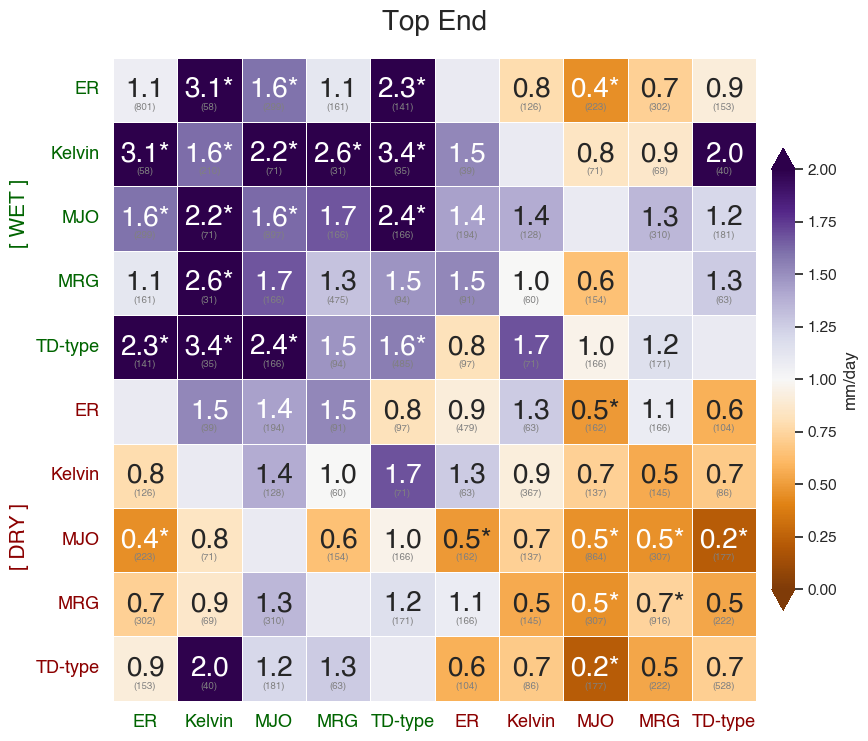

In [25]:
fig = plt.figure(figsize = [10, 10])
g = sns.heatmap(x,vmin=0,vmax=2, 
                 annot = x_sig, 
                 annot_kws={'fontsize':20,'fontweight':1000,'va':'bottom'},
                 fmt='', 
                 linewidths = .5,
                 cmap = plt.cm.get_cmap('PuOr'), cbar_kws={
                     'label': 'mm/day', 'shrink': 0.6, 'pad':0.02, 'extend':'both'},
                square=True,
               
               )


h = sns.heatmap(n, 
                 annot = n_label, 
                 annot_kws={'fontsize':7,'fontweight':10,'va':'top','color':'grey',
                            },
                 fmt='', 
                 linewidths = .5,
#                 cmap = "white",
                alpha = 0.0,
                cbar=False,
                square=True,
               
               )

import matplotlib
for t in h.texts:
    trans = t.get_transform()
    offs = matplotlib.transforms.ScaledTranslation(0., 0.2,
                    matplotlib.transforms.IdentityTransform())
    t.set_transform( offs + trans )


g.tick_params(axis='x', colors='darkgreen')
g.tick_params(axis='y', colors='darkgreen')

for label in enumerate(g.xaxis.get_ticklabels()):
    label[1].set_fontsize(13)
    if label[0]>4:
        label[1].set_color("darkred")
  
for label in enumerate(g.yaxis.get_ticklabels()):
    label[1].set_fontsize(13)
    label[1].set_rotation(-360)
#     print(label[0])
    if label[0]>4:
        label[1].set_color("darkred")

g.text(-1.6,2.9,"[ WET ]",fontsize=15,rotation=90,color="darkgreen",weight="extra bold")
g.text(-1.6,7.9,"[ DRY ]",fontsize=15,rotation=90,color="darkred",weight="extra bold")

g.set_title("Top End", fontsize=20, pad=20)

Text(0.5, 1.0, 'Queensland')

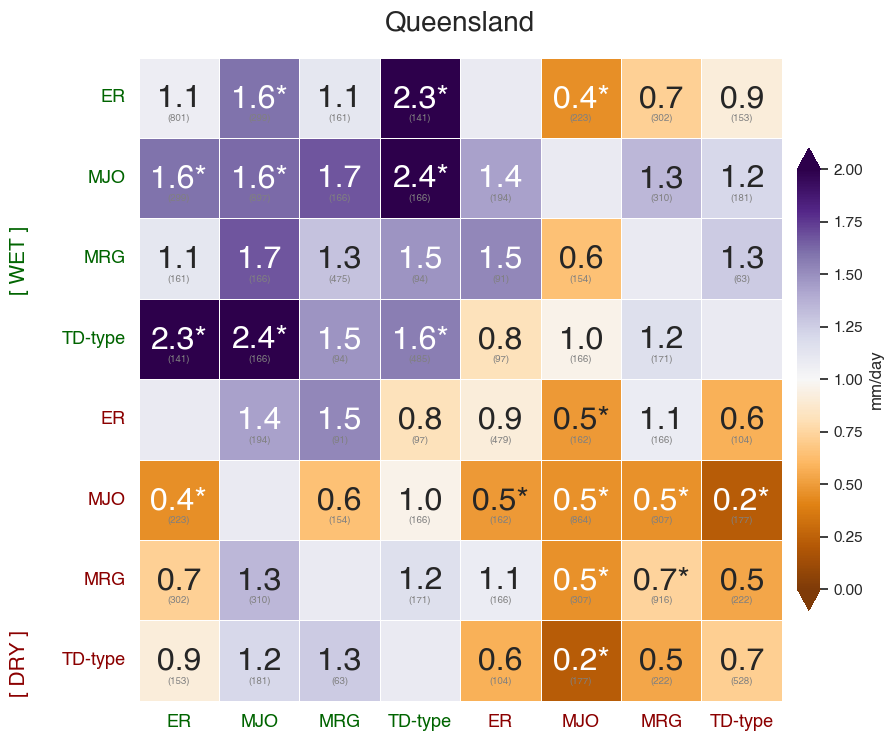

In [26]:
x2 = x.drop(x.columns[idrop], axis=1)
x2 = x2.drop(x.index[idrop])

x_sig2 = x_sig.drop(x_sig.columns[idrop], axis=1)
x_sig2 = x_sig2.drop(x_sig.index[idrop])


n_label2 = n_label.drop(n_label.columns[idrop], axis=1)
n_label2 = n_label2.drop(n_label.index[idrop])



fig = plt.figure(figsize = [10, 10])
g = sns.heatmap(x2,vmin=0,vmax=2, 
                 annot = x_sig2, 
                 annot_kws={'fontsize':23,'fontweight':1000,'va':'bottom'},
                 fmt='', 
                 linewidths = .5,
                 cmap = plt.cm.get_cmap('PuOr'), cbar_kws={
                     'label': 'mm/day', 'shrink': 0.6, 'pad':0.02, 'extend':'both'},
                square=True,
               
               )


h = sns.heatmap(x2, 
                 annot = n_label2, 
                 annot_kws={'fontsize':7,'fontweight':10,'va':'top','color':'grey',
                            },
                 fmt='', 
                 linewidths = .5,
#                 cmap = "white",
                alpha = 0.0,
                cbar=False,
                square=True,
               
               )

import matplotlib
for t in h.texts:
    trans = t.get_transform()
    offs = matplotlib.transforms.ScaledTranslation(0., 0.2,
                    matplotlib.transforms.IdentityTransform())
    t.set_transform( offs + trans )


g.tick_params(axis='x', colors='darkgreen')
g.tick_params(axis='y', colors='darkgreen')

for label in enumerate(g.xaxis.get_ticklabels()):
    label[1].set_fontsize(13)
    if label[0]>3:
        label[1].set_color("darkred")
  
for label in enumerate(g.yaxis.get_ticklabels()):
    label[1].set_fontsize(13)
    label[1].set_rotation(-360)
#     print(label[0])
    if label[0]>3:
        label[1].set_color("darkred")

g.text(-1.6,2.9,"[ WET ]",fontsize=15,rotation=90,color="darkgreen",weight="extra bold")
g.text(-1.6,7.9,"[ DRY ]",fontsize=15,rotation=90,color="darkred",weight="extra bold")

g.set_title("Queensland", fontsize=20, pad=20)

In [27]:
x.columns
# flights_piv.columns

Index(['ER', 'Kelvin', 'MJO', 'MRG', 'TD-type', 'ER', 'Kelvin', 'MJO', 'MRG',
       'TD-type'],
      dtype='object')

In [28]:
fig.savefig(diro+"combined_ext_QL."+seas+".png",dpi=300)
fig.savefig(diro+"combined_ext_QL."+seas+".eps", dpi=300)